## Buddy Bass Fishing Tournament

Dataset:
The dataset I'll use is an excel spreadsheet with data collected from the weekly fishing tournament.

### Importing the Data

This is where I import any needed Python libraries and all datasets I'll use in the notebook.

In [41]:
# Import libraries
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Column of dates to parse
date_col = ["Date"]

# Read the Excel file for the year 2020
buddy_bass_2020 = pd.read_excel("data/Buddy Bass Tournament 2020.xlsx", skiprows=1, parse_dates=date_col)



In [42]:
# Read the Excel file for years 2016-2019
buddy_bass_tournament19 = pd.read_excel("data/Buddy Bass Tournament 2019.xlsx", skiprows=2, parse_dates=["Date"])

buddy_bass_tournament18 = pd.read_excel("data/Buddy Bass Tournament 2018.xlsx", skiprows=2, parse_dates=["Date"])

buddy_bass_tournament17 = pd.read_excel("data/Buddy Bass Tournament 2017.xlsx", skiprows=2, parse_dates=["Date"])

buddy_bass_tournament16 = pd.read_excel("data/Buddy Bass Tournament 2016.xlsx", skiprows=2, parse_dates=["Date"])

In [43]:
buddy_bass_2019 = buddy_bass_tournament19.drop(columns=['Big Fish/Year (LBS)'])

buddy_bass_2019.head()

,Date,Total No of Fish Caught,Total Weight in Pounds,Average Weight (LBS),Big Fish (LBS)
0,2020-04-17 00:00:00,25.0,53.30,2.132,5.60
1,2020-04-24 00:00:00,22.0,35.36,1.607273,5.14
2,2020-05-01 00:00:00,39.0,69.80,1.789744,5.56
3,2020-05-08 00:00:00,24.0,42.20,1.758333,5.20
4,2020-05-15 00:00:00,61.0,92.20,1.511475,4.90


### Exploring the Imported Data

In [44]:
# View the first 5 rows of data
buddy_bass_2020.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
0,2020-06-24,29.0,49.0,69.80,4.32,75.2
1,2020-07-01,33.0,61.0,42.20,5.26,76.8
2,2020-07-08,26.0,50.0,92.20,4.50,76.8
3,2020-07-15,29.0,54.0,90.31,4.26,78.5
4,2020-07-22,32.0,48.0,52.94,5.36,80.4


.info() shows information about the columns including data type and number of missing values

In [45]:
# Display information about the columns
buddy_bass_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     11 non-null     datetime64[ns]
 1   Number of Boats          11 non-null     float64       
 2   Total No of Fish Caught  11 non-null     float64       
 3   Total Weight in Pounds   11 non-null     float64       
 4   Big Fish (LBS)           11 non-null     float64       
 5   Avg Water Temp           11 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 656.0 bytes


.shape returns the number of rows and columns

In [46]:
# Return the number of rows and columns in the data
buddy_bass_2020.shape

(11, 6)

.describe() calculates summary statistics for each column

In [47]:
# Display a summary of statistics calculated for each column
buddy_bass_2020.describe()

,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,30.272727,54.272727,67.322727,4.220000,80.518182
std,3.068906,14.886846,16.734061,1.009911,3.602171
min,26.000000,33.000000,42.200000,2.340000,75.200000
25%,28.500000,48.500000,54.160000,3.810000,77.650000
50%,30.000000,54.000000,68.780000,4.320000,80.400000
75%,31.500000,59.500000,78.230000,4.880000,83.300000
max,37.000000,84.000000,92.200000,5.440000,85.300000


.columns creates an index of the column names

In [48]:
# Creates an index of the column names
buddy_bass_2020.columns

Index(['Date', 'Number of Boats', 'Total No of Fish Caught',
       'Total Weight in Pounds', 'Big Fish (LBS)', 'Avg Water Temp'],
      dtype='object')

In [49]:
# Create a new column called "Average Fish Weight" 

buddy_bass_2020["Average Fish Weight"] = buddy_bass_2020["Total Weight in Pounds"] / buddy_bass_2020["Total No of Fish Caught"]

print(buddy_bass_2020)

         Date  Number of Boats  Total No of Fish Caught  \
0  2020-06-24             29.0                     49.0   
1  2020-07-01             33.0                     61.0   
2  2020-07-08             26.0                     50.0   
3  2020-07-15             29.0                     54.0   
4  2020-07-22             32.0                     48.0   
5  2020-07-29             31.0                     56.0   
6  2020-08-05             37.0                     71.0   
7  2020-08-12             31.0                     33.0   
8  2020-08-19             28.0                     58.0   
9  2020-08-26             30.0                     33.0   
10 2020-09-13             27.0                     84.0   

    Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  \
0                    69.80            4.32            75.2   
1                    42.20            5.26            76.8   
2                    92.20            4.50            76.8   
3                    90.31            4.26 

In [50]:
buddy_bass_2020[["Number of Boats", "Total No of Fish Caught"]]

,Number of Boats,Total No of Fish Caught
0,29.0,49.0
1,33.0,61.0
2,26.0,50.0
3,29.0,54.0
4,32.0,48.0
5,31.0,56.0
6,37.0,71.0
7,31.0,33.0
8,28.0,58.0
9,30.0,33.0


In [51]:
buddy_bass_2020[buddy_bass_2020["Number of Boats"] < 30]

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Average Fish Weight
0,2020-06-24,29.0,49.0,69.80,4.32,75.2,1.424490
2,2020-07-08,26.0,50.0,92.20,4.50,76.8,1.844000
3,2020-07-15,29.0,54.0,90.31,4.26,78.5,1.672407
8,2020-08-19,28.0,58.0,55.38,4.46,85.3,0.954828
10,2020-09-13,27.0,84.0,78.23,4.28,78.8,0.931310


In [64]:
# Add a new column "Month" that turns the "Date" column into it's month number equivalent
buddy_bass_2020["Month"] = buddy_bass_2020["Date"]\
    .dt.month

print(buddy_bass_2020)


         Date  Number of Boats  Total No of Fish Caught  \
0  2020-06-24             29.0                     49.0   
1  2020-07-01             33.0                     61.0   
2  2020-07-08             26.0                     50.0   
3  2020-07-15             29.0                     54.0   
4  2020-07-22             32.0                     48.0   
5  2020-07-29             31.0                     56.0   
6  2020-08-05             37.0                     71.0   
7  2020-08-12             31.0                     33.0   
8  2020-08-19             28.0                     58.0   
9  2020-08-26             30.0                     33.0   
10 2020-09-13             27.0                     84.0   

    Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  \
0                    69.80            4.32            75.2   
1                    42.20            5.26            76.8   
2                    92.20            4.50            76.8   
3                    90.31            4.26 

In [66]:
buddy_bass_month = buddy_bass_2020[["Month"]]

print(buddy_bass_month)

    Month
0       6
1       7
2       7
3       7
4       7
5       7
6       8
7       8
8       8
9       8
10      9


In [68]:
# Define an empty list
colors = []

# Iterate over rows of buddy_bass_month
for lab, row in buddy_bass_month.iterrows() :
    if row["Month"] == 6 :
        colors.append("green")
    elif row["Month"] == 7 :
        colors.append("blue")
    elif row["Month"] == 8 :
        colors.append("purple") 
    else:
        colors.append("red")

print(colors)    

['green', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'red']


In [ ]:
for lab, row in buddy_bass_2020.iterrows():
    print(lab)
    print(row)

0
Date                        2020-06-24 00:00:00
Number of Boats                            29.0
Total No. of Fish Caught                   49.0
Total Weight in Pounds                     69.8
Big Fish (lbs)                             4.32
Avg Water Temp                             75.2
Name: 0, dtype: object
1
Date                        2020-07-01 00:00:00
Number of Boats                            33.0
Total No. of Fish Caught                   61.0
Total Weight in Pounds                     42.2
Big Fish (lbs)                             5.26
Avg Water Temp                             76.8
Name: 1, dtype: object
2
Date                        2020-07-08 00:00:00
Number of Boats                            26.0
Total No. of Fish Caught                   50.0
Total Weight in Pounds                     92.2
Big Fish (lbs)                              4.5
Avg Water Temp                             76.8
Name: 2, dtype: object
3
Date                        2020-07-15 00:00:00
Number of B

In [ ]:
buddy_bass_2020["Total No. of Fish Caught"].median()

54.0

In [ ]:
buddy_bass_2020[["Number of Boats", "Total No. of Fish Caught", "Total Weight in Pounds", "Big Fish (lbs)"]].median()

Number of Boats             30.00
Total No. of Fish Caught    54.00
Total Weight in Pounds      68.78
Big Fish (lbs)               4.32
dtype: float64

In [ ]:
buddy_bass_2020.groupby("Date")["Number of Boats"].mean()

Date
2020-06-24    29.0
2020-07-01    33.0
2020-07-08    26.0
2020-07-15    29.0
2020-07-22    32.0
2020-07-29    31.0
2020-08-05    37.0
2020-08-12    31.0
2020-08-19    28.0
2020-08-26    30.0
2020-09-13    27.0
Name: Number of Boats, dtype: float64

In [ ]:
buddy_bass_2020["Date"]\
    .head(3)\
        .dt.year

0    2020
1    2020
2    2020
Name: Date, dtype: int64

In [ ]:
buddy_bass["Date"]\
    .head()\
        .dt.day_name()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: Date, dtype: object

In [ ]:
buddy_bass_month = buddy_bass_2020["Date"]\
    .dt.month

print(buddy_bass_month)

0     6
1     7
2     7
3     7
4     7
5     7
6     8
7     8
8     8
9     8
10    9
Name: Date, dtype: int64


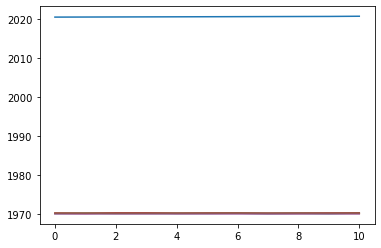

In [ ]:
plt.plot(buddy_bass)
plt.show()